<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-1">Dependencies</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2">Functions</a></span></li><li><span><a href="#Paths" data-toc-modified-id="Paths-3">Paths</a></span></li><li><span><a href="#Main" data-toc-modified-id="Main-4">Main</a></span></li></ul></div>

# Dependencies

In [1]:
options(scipen = 999)

In [2]:
library(ComplexHeatmap)
library(circlize)

Loading required package: grid

ComplexHeatmap version 2.6.2
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


circlize version 0.4.12
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))




# Functions

In [3]:
source("~/OneDrive - UHN/R_src/ggplot2_theme.R")
source("~/OneDrive - UHN/R_src/color_schemes.R")
source("~/OneDrive - UHN/R_src/Heatmap_functions.R")

In [31]:
heatmap_music_fx <- function(ipd_df, pdx_df, cancer, col_fun){
  
  ipd_mat <- as.matrix(t(ipd_df))    
    
  cells_hm = Heatmap(ipd_mat,
                     #titles and names   
                     name = cancer,   
                     show_row_names = TRUE,
                     show_column_names = FALSE,     
                     #clusters and orders  
                     cluster_columns = TRUE,
                     cluster_rows = TRUE,
                     show_column_dend = TRUE,
                     #aesthestics
                     col = col_fun,
                     column_names_gp = gpar(fontsize = 10),
                     row_names_gp = gpar(fontsize = 10),
                     height = unit(nrow(ipd_mat), "cm"),
                     column_title_gp = gpar(fontsize = 20),
                     column_title = "TARGET NBL",
                     row_title = NULL)  
  
  
  pdx_mat <- as.matrix(t(pdx_df))   
  
  pdx_cells_hm = Heatmap(pdx_mat,
                         #titles and names   
                         name = cancer,   
                         show_row_names = TRUE,
                         show_column_names = FALSE,     
                         #clusters and orders  
                         cluster_columns = TRUE,
                         cluster_rows = TRUE,
                         show_column_dend = TRUE,
                         #aesthestics
                         col = col_fun,
                         column_names_gp = gpar(fontsize = 10),
                         row_names_gp = gpar(fontsize = 10),
                         height = unit(nrow(pdx_mat), "cm"),
                         column_title_gp = gpar(fontsize = 20),
                         column_title = "PDX NBL",
                         row_title = NULL)    
  
  
  return(draw(pdx_cells_hm + cells_hm))    
}

# Paths

In [18]:
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Manifests/"
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Plots/"

# Main

In [19]:
load(paste0(datapath,"ESTIMATE/estimate_manifest_primary_clean_final.RData"))

In [20]:
ped <- estimate_manifest_primary_clean[ estimate_manifest_primary_clean$group != "TCGA",]

In [21]:
table(ped$group)


  CBTN   ICGC TARGET 
   581    196    149 

In [22]:
filelist <- list.files(paste0(datapath, "MUSIC/"), full.names = T, pattern = "MuSiC")

In [23]:
nblfiles <- lapply(filelist[grepl("NB", filelist)], 
                   function(f){read.table(f, sep = "\t",header = TRUE, stringsAsFactors = F, check.names = F, row.names = 1)})

In [24]:
pdx_nbl <- nblfiles[[1]]
pdx_nbl <- pdx_nbl[,2:5]

target_nbl <- nblfiles[[2]]
target_nbl <- target_nbl[,2:5]

Warning message:
“Heatmap/annotation names are duplicated: NBL”


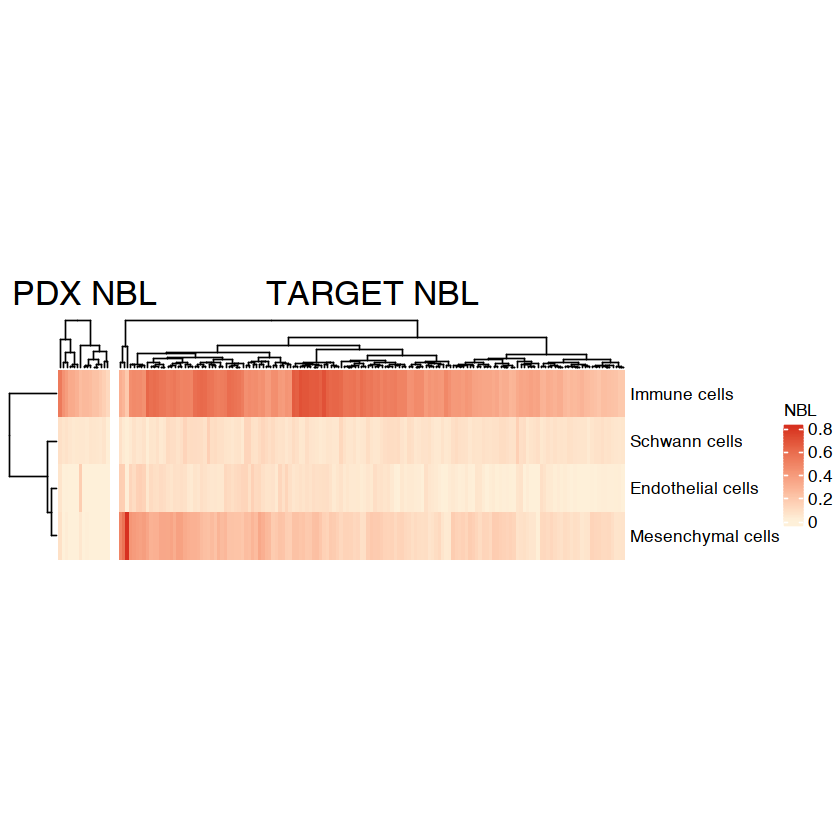

In [32]:
col_fun = colorRamp2(c(0, 0.8), c("#fef0d9", "#d7301f"))

heatmap_music_fx(target_nbl, pdx_nbl, "NBL", col_fun)

In [33]:
col_fun = colorRamp2(c(0, 0.8), c("#fef0d9", "#d7301f"))

pdf(paste0(plotpath, "TARGET_PDX_NBL_MuSiC.pdf"),
   width = 16, height = 10)

heatmap_music_fx(target_nbl, pdx_nbl, "NBL", col_fun)

dev.off()

Warning message:
“Heatmap/annotation names are duplicated: NBL”


pdf 
  2